In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

data = pd.read_csv('final_df.csv')

features = ['season', 'round', 'driver_points', 'driver_standings_pos', 'driver_wins',
            'constructor_points', 'constructor_standings_pos', 'constructor_wins']

additional_features = ['fp_pos_1', 'fp_time_1', 'fp_pos_2', 'fp_time_2', 'fp_pos_3', 'fp_time_3']

all_features = features + additional_features

for feature in additional_features:
    if 'time' in feature:
        data[feature].fillna(data[feature].median(), inplace=True)
    else:
        data[feature].fillna(100, inplace=True)

data['top_10_finish'] = np.where(data['podium'] <= 10, 1, 0)

X = data[all_features]
y = data['top_10_finish']

X_train = X[data['season'] != 2023]
y_train = y[data['season'] != 2023]
X_test = X[data['season'] == 2023]
y_test = y[data['season'] == 2023]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

neuralnet = MLPClassifier(solver='sgd', batch_size= 100, random_state=0, max_iter=1000)
neuralnet.fit(X_train_scaled, y_train)

###
y_pred = neuralnet.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

data_2023 = data[data['season'] == 2023].copy()

data_2023.loc[:, 'predicted_probability'] = neuralnet.predict_proba(X_test_scaled)[:, 1]
top_10_predictions = data_2023.groupby('round').apply(lambda x: x.nlargest(10, 'predicted_probability')).reset_index(drop=True)

print("Accuracy for 2023 season:", accuracy)
print("\n")

unique_rounds = data_2023['round'].unique()
for r in unique_rounds:
    print(f"Round {r} - Top 10 Predictions:")
    round_predictions = top_10_predictions[top_10_predictions['round'] == r]
    print(round_predictions[['season', 'round', 'driver_name', 'predicted_probability']])
    print("\n")


Accuracy for 2023 season: 0.7954545454545454


Round 1 - Top 10 Predictions:
   season  round      driver_name  predicted_probability
0    2023      1  fernando alonso               0.860113
1    2023      1     sergio perez               0.832007
2    2023      1   max verstappen               0.830736
3    2023      1  charles leclerc               0.746872
4    2023      1     lance stroll               0.672520
5    2023      1   lewis hamilton               0.590864
6    2023      1     lando norris               0.579154
7    2023      1      guanyu zhou               0.491724
8    2023      1  nico hulkenberg               0.469373
9    2023      1   george russell               0.432591


Round 2 - Top 10 Predictions:
    season  round      driver_name  predicted_probability
10    2023      2   max verstappen               0.902479
11    2023      2  fernando alonso               0.851142
12    2023      2     sergio perez               0.842539
13    2023      2     lance stro

In [ ]:
#Checking Null weather values

nan_in_weather_cloudy = data['weather_cloudy'].isna().any()
print("NaN in weather_cloudy:", nan_in_weather_cloudy)
nan_in_weather_cloudy = data['weather_cold'].isna().any()
print("NaN in weather_cold:", nan_in_weather_cloudy)
nan_in_weather_cloudy = data['weather_wet'].isna().any()
print("NaN in weather_wet:", nan_in_weather_cloudy)

NaN in weather_cloudy: False
NaN in weather_cold: False
NaN in weather_wet: False


In [ ]:
#HAS SOME PROBLEMS
# Take 3 - To predict top 10 for each round in 2023 season and the accuracy of the predictions
data = pd.read_csv('final_df.csv')

features = [
    'season', 'round', 'driver_points', 'driver_standings_pos', 'driver_wins',
    'constructor_points', 'constructor_standings_pos', 'constructor_wins'
]

additional_features = [
    'fp_pos_1', 'fp_time_1', 'fp_pos_2', 'fp_time_2', 'fp_pos_3', 'fp_time_3'
]

'''weather_features = [
    'weather_cloudy', 'weather_cold', 'weather_dry', 'weather_warm', 'weather_wet'
]'''

all_features = features + additional_features

for feature in additional_features:
    if 'time' in feature:
        data[feature].fillna(data[feature].median(), inplace=True)
    else:
        data[feature].fillna(100, inplace=True)

'''for feature in weather_features:
    data[feature].fillna(data[feature].mode()[0], inplace=True)'''

data['top_10_finish'] = np.where(data['podium'] <= 10, 1, 0)

X = data[all_features]
y = data['top_10_finish']

X_train = X[data['season'] != 2023]
y_train = y[data['season'] != 2023]
X_test = X[data['season'] == 2023]
y_test = y[data['season'] == 2023]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

neuralnet = MLPClassifier(solver='sgd', batch_size= 100, random_state=0, max_iter=1000)
neuralnet.fit(X_train_scaled, y_train)

y_pred = neuralnet.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

data_2023 = data[data['season'] == 2023].copy()
data_2023.loc[:, 'predicted_probability'] = neuralnet.predict_proba(X_test_scaled)[:, 1]

top_10_predictions = data_2023.groupby('round').apply(lambda x: x.nlargest(10, 'predicted_probability')).reset_index(drop=True)

print("Accuracy for 2023 season:", accuracy)
print("\n")

unique_rounds = data_2023['round'].unique()
for r in unique_rounds:
    print(f"Round {r} - Top 10 Predictions:")
    round_predictions = top_10_predictions[top_10_predictions['round'] == r]
    print(round_predictions[['season', 'round', 'driver_name', 'predicted_probability']])
    print("\n")

Accuracy for 2023 season: 0.7954545454545454


Round 1 - Top 10 Predictions:
   season  round      driver_name  predicted_probability
0    2023      1  fernando alonso               0.860113
1    2023      1     sergio perez               0.832007
2    2023      1   max verstappen               0.830736
3    2023      1  charles leclerc               0.746872
4    2023      1     lance stroll               0.672520
5    2023      1   lewis hamilton               0.590864
6    2023      1     lando norris               0.579154
7    2023      1      guanyu zhou               0.491724
8    2023      1  nico hulkenberg               0.469373
9    2023      1   george russell               0.432591


Round 2 - Top 10 Predictions:
    season  round      driver_name  predicted_probability
10    2023      2   max verstappen               0.902479
11    2023      2  fernando alonso               0.851142
12    2023      2     sergio perez               0.842539
13    2023      2     lance stro

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

data = pd.read_csv('final_df.csv')

features = ['season', 'round', 'driver_points', 'driver_standings_pos', 'driver_wins',
            'constructor_points', 'constructor_standings_pos', 'constructor_wins']

additional_features = ['fp_pos_1', 'fp_time_1', 'fp_pos_2', 'fp_time_2', 'fp_pos_3', 'fp_time_3']

all_features = features + additional_features

for feature in additional_features:
    if 'time' in feature:
        data[feature].fillna(data[feature].median(), inplace=True)
    else:
        data[feature].fillna(100, inplace=True)

data['top_10_finish'] = np.where(data['podium'] <= 10, 1, 0)

X = data[all_features]
y = data['top_10_finish']

X_train = X[data['season'] < 2022]
y_train = y[data['season'] < 2022]
X_test = X[data['season'] == 2022]
y_test = y[data['season'] == 2022]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

neuralnet = MLPClassifier(solver='sgd', batch_size= 100, random_state=0, max_iter=1000)
neuralnet.fit(X_train_scaled, y_train)

###
probabilities = neuralnet.predict_proba(X_test_scaled)[:, 1]

data_2022 = data[data['season'] == 2022].copy()
data_2022['predicted_probability'] = probabilities

driver_probabilities = data_2022.groupby('driver_name')['predicted_probability'].mean().sort_values(ascending=False)
top_10_finishers = driver_probabilities.head(10)

y_pred = neuralnet.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for 2022 season:", accuracy)
print("\n")
print("Top 10 Predicted Finishers for 2022 Season:")
print(top_10_finishers)


Accuracy for 2022 season: 0.7272727272727273


Top 10 Predicted Finishers for 2022 Season:
driver_name
max verstappen      0.918474
charles leclerc     0.868370
carlos sainz        0.808888
george russell      0.772584
lewis hamilton      0.757531
sergio perez        0.736767
fernando alonso     0.673570
lando norris        0.665174
esteban ocon        0.599146
daniel ricciardo    0.501275
Name: predicted_probability, dtype: float64


# **Learning Curve**

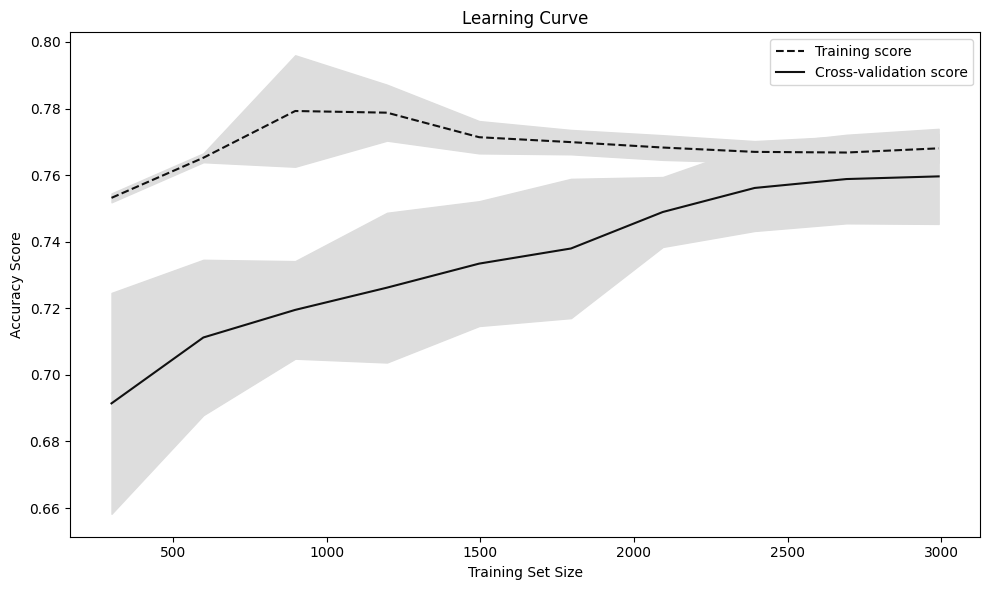

Accuracy for 2022 season: 0.7272727272727273


Top 10 Predicted Finishers for 2022 Season:
driver_name
max verstappen      0.918474
charles leclerc     0.868370
carlos sainz        0.808888
george russell      0.772584
lewis hamilton      0.757531
sergio perez        0.736767
fernando alonso     0.673570
lando norris        0.665174
esteban ocon        0.599146
daniel ricciardo    0.501275
Name: predicted_probability, dtype: float64


In [ ]:
data = pd.read_csv('final_df.csv')

features = ['season', 'round', 'driver_points', 'driver_standings_pos', 'driver_wins',
            'constructor_points', 'constructor_standings_pos', 'constructor_wins']

additional_features = ['fp_pos_1', 'fp_time_1', 'fp_pos_2', 'fp_time_2', 'fp_pos_3', 'fp_time_3']

all_features = features + additional_features

for feature in additional_features:
    if 'time' in feature:
        data[feature].fillna(data[feature].median(), inplace=True)
    else:
        data[feature].fillna(100, inplace=True)

data['top_10_finish'] = np.where(data['podium'] <= 10, 1, 0)

X = data[all_features]
y = data['top_10_finish']

X_train = X[data['season'] < 2022]
y_train = y[data['season'] < 2022]
X_test = X[data['season'] == 2022]
y_test = y[data['season'] == 2022]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

neuralnet = MLPClassifier(solver='sgd', batch_size= 100, random_state=0, max_iter=1000)
neuralnet.fit(X_train_scaled, y_train)

###

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

train_sizes, train_scores, test_scores = learning_curve(neuralnet, X_scaled, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,6))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

neuralnet.fit(X_train_scaled, y_train)
probabilities = neuralnet.predict_proba(X_test_scaled)[:, 1]

data_2022 = data[data['season'] == 2022].copy()
data_2022['predicted_probability'] = probabilities

driver_probabilities = data_2022.groupby('driver_name')['predicted_probability'].mean().sort_values(ascending=False)
top_10_finishers = driver_probabilities.head(10)

y_pred = neuralnet.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for 2022 season:", accuracy)
print("\n")
print("Top 10 Predicted Finishers for 2022 Season:")
print(top_10_finishers)